# Analyse des ventes d'une librairie en ligne

## Introduction

### Table des matières

1. [Préparation](#1.-Préparation)
    - 1.1 [Importation des librairies](#1.1-Importation-des-librairies)
    - 1.2 [Chargement des fichiers](#1.2-Chargement-des-fichiers)
    
2. [Analyses exploratoire des fichiers](#2.-Analyses-exploratoire-des-fichiers)
    - 2.1 [Analyse exploratoire du fichier customers](#2.1-Analyse-exploratoire-du-fichier-customers)
    - 2.2 [Analyse exploratoire du fichier products](#2.2-Analyse-exploratoire-du-fichier-products)  
    - 2.3 [Analyse exploratoire du fichier transactions](#2.3-Analyse-exploratoire-du-fichier-transactions)  
3. [Agrégation des données](#3.-Agrégation-des-données)
    - 3.1 [Jointure des Data frame customers et transaction](#3.1-Jointure-des-Data-frame-customers-et-transaction)
    - 3.2 [Jointure avec le Data frame products](#3.2-Jointure-avec-le-Data-frame-products)
    - 3.3 [Traitement des erreurs dans le nouveau Data Frame](#3.3-Traitement-des-erreurs-dans-le-nouveau-Data-Frame)
4. [Analyses](#4.-Analyses)
    - 4.1 [Analyse sur le chiffre d'affaires](#4.1-Analyse-sur-le-chiffre-d'affaires)
    - 4.2 [Analyse des ventes](#4.2-Analyse-des-ventes)
    - 4.3 [Analyse des prix](#4.3-Analyse-des-prix)
    - 4.4 [Analyse des références](#4.4-Analyse-des-références)
    - 4.5 [Profil des clients](#4.5-Profil-des-clients)
    - 4.6 [Analyse des comportements d'achat](#4.6-Analyse-des-comportements-d'achat)
5. [Analyse des liaisons et corrélations](#5.-Analyse-des-liaisons-et-corrélations)
    - 5.1 [Liaison entre genre et catégorie de livre acheté](#5.1-Liaison-entre-genre-et-catégorie-de-livre-acheté)
    - 5.2 [Corrélation entre l'âge et le montant total des achats](#5.2-Corrélation-entre-l'âge-et-le-montant-total-des-achats)
    - 5.3 [Corrélation entre l'âge et la fréquence des achats](#5.3-Corrélation-entre-l'âge-et-la-fréquence-d'achat)
    - 5.4 [Corrélation entre l'âge et le panier moyen](#5.4-Corrélation-entre-l'âge-et-le-panier-moyen)
    - 5.5 [Liaison entre l'âge des clients et la catégorie de livre acheté](#5.5-Liaison-entre-l'âge-des-clients-et-la-catégorie-de-livre-acheté)


# 1. Préparation

## 1.1 Importation des librairies

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
from scipy import stats
from scipy.stats import shapiro, spearmanr,f_oneway, levene
from scipy.stats import chi2_contingency
from scipy.stats import kstest, norm
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error


## 1.2 Chargement des fichiers

In [68]:
customers = pd.read_csv('DAN-P6-donnees\DAN-P6-donnees\customers.csv', delimiter=',')
products = pd.read_csv('DAN-P6-donnees\DAN-P6-donnees\products.csv',delimiter=',')
transactions = pd.read_csv(r'DAN-P6-donnees\DAN-P6-donnees\transactions.csv', delimiter=',')


# 2. Analyses exploratoire des fichiers

## 2.1 Analyse exploratoire du fichier customers

### Découverte du Data frame

In [69]:
# Affichage des 5 premières lignes
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [70]:
# Affichage des dimensions du Df et des types des colonnes
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [71]:
# Affichage des statistiques
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [72]:
#Valeurs manquantes

customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

Le df se compose de 8623 lignes et 3 colonnes, il n'y a pas de valeurs manquantes, et la colonne client_id ne contient pas de doublons 

### Distribution de la variable Birth

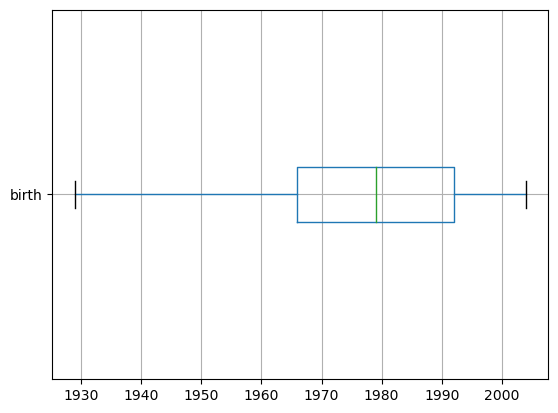

In [73]:
customers.boxplot(column="birth", vert=False)
plt.show()

Les valeurs de la colonne 'birth' ne semblent pas contenir de valeurs aberrantes

## 2.2 Analyse exploratoire du fichier products

### Découverte du Data frame

In [74]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [75]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [76]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [77]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

### 2.2.2 Traitement de la colonne price

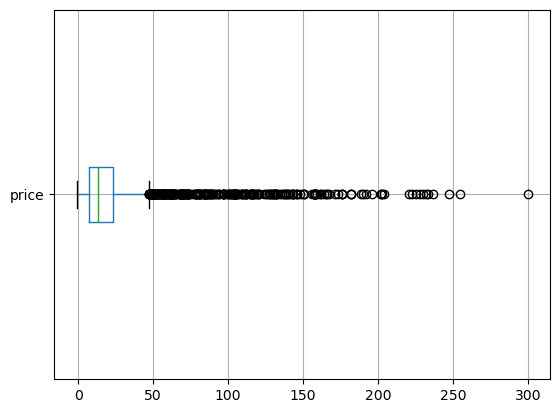

In [78]:
# Visualisation de la distribution de la variable price
products.boxplot(column="price", vert=False)
plt.show()

Les valeurs extrêmes sont cohérentes avec le prix de livres rares ou d'édition de luxe.
On a constaté cependant la présence de valeurs négatives dans les prix ce qui nécessite une exploration plus approfondie

In [79]:
products.loc[products['price']<0,:]

,id_prod,price,categ
731,T_0,-1.0,0


On soupçonne une erreure de saisie que l'on corrige

In [80]:
products.loc[products['price']<0,'price']= 1

In [81]:
products.loc[products['id_prod']=='T_0',:]

,id_prod,price,categ
731,T_0,1.0,0


## 2.3 Analyse exploratoire du fichier transaction

### Découverte du Data Frame

In [82]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [83]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [84]:
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [85]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

### Traitement de la colonne date

In [86]:
transactions.loc[transactions['date'].str.contains('test'),:]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Les dates commençant par test semblent correspondre à des transactions fictives qui ont servi à tester le site. De même les id_prod, session_id et client_id sont des identifiants tests et nous pouvont supprimer ces lignes.

In [87]:
transactions = transactions.loc[~transactions['date'].str.contains('test')]

In [88]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [89]:
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

In [90]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


# 3. Agrégation des données

## 3.1 Jointure des Data frame customers et transaction

In [91]:
# Jointure
Jointure_cust_trans = pd.merge(customers, transactions, on='client_id', how= 'outer')

In [92]:
# Vérification
Jointure_cust_trans.shape

(679355, 6)

## 3.2 Jointure avec le Data frame products

In [93]:
data = pd.merge(Jointure_cust_trans, products, how='outer', on='id_prod' )

In [94]:
data.shape

(679377, 8)

In [95]:
data.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.2,0.0
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.2,0.0
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.2,0.0
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.2,0.0
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.2,0.0


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679377 entries, 0 to 679376
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   679355 non-null  object        
 1   sex         679355 non-null  object        
 2   birth       679355 non-null  float64       
 3   id_prod     679354 non-null  object        
 4   date        679332 non-null  datetime64[ns]
 5   session_id  679332 non-null  object        
 6   price       679133 non-null  float64       
 7   categ       679133 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 41.5+ MB


## 3.3 Traitement des erreurs dans le nouveau Data Frame

In [97]:
resultat = pd.DataFrame({
    'Valeurs manquantes': data.isnull().sum(),
    ' Taux valeurs manquantes': data.isnull().mean()
})
resultat

,Valeurs manquantes,Taux valeurs manquantes
client_id,22,0.000032
sex,22,0.000032
birth,22,0.000032
id_prod,23,0.000034
date,45,0.000066
session_id,45,0.000066
price,244,0.000359
categ,244,0.000359


Les taux de valeurs manquantes sont faibles mais nous allons les traiter cas par cas

### Cas des Na de la colonne 'price' et 'categ'

In [98]:
price_na= data.loc[data['price'].isna(),:]
price_na

,client_id,sex,birth,id_prod,date,session_id,price,categ
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN
...,...,...,...,...,...,...,...,...
668012,c_7584,f,1960.0,NaN,NaT,NaN,NaN,NaN
668013,c_90,m,2001.0,NaN,NaT,NaN,NaN,NaN
668014,c_587,m,1993.0,NaN,NaT,NaN,NaN,NaN
668015,ct_1,m,2001.0,NaN,NaT,NaN,NaN,NaN


In [99]:
price_na['id_prod'].value_counts()

id_prod
0_2245    221
Name: count, dtype: int64

In [100]:
data.loc[data['id_prod']=='0_2245',:]

,client_id,sex,birth,id_prod,date,session_id,price,categ
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN
...,...,...,...,...,...,...,...,...
542267,c_4283,f,1976.0,0_2245,2022-08-01 02:46:38.931757,s_246657,NaN,NaN
542268,c_4283,f,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,NaN,NaN
542269,c_6236,f,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,NaN,NaN
542270,c_4453,m,1981.0,0_2245,2022-02-16 11:35:20.319501,s_166050,NaN,NaN


On constate que les Na sur le prix et la catégorie concerne la référence '0_2245' dans 221 cas, sans doute à cause d'un oubli ou d'une erreur de saisie. Grâce à l'identifiant commençant par 0 nous savons que categ=0, pour implémenter le prix nous appliquons donc la médiane des produits de la catégorie '0'.

In [101]:
categ0_median_price=data.loc[data['categ']==0,'price'].median()
categ0_median_price

9.99

In [102]:
data.loc[data['id_prod']=='0_2245',['price','categ']]=(categ0_median_price,0)
data.loc[data['id_prod']=='0_2245',:]

,client_id,sex,birth,id_prod,date,session_id,price,categ
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,9.99,0.0
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,9.99,0.0
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,9.99,0.0
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,9.99,0.0
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,9.99,0.0
...,...,...,...,...,...,...,...,...
542267,c_4283,f,1976.0,0_2245,2022-08-01 02:46:38.931757,s_246657,9.99,0.0
542268,c_4283,f,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,9.99,0.0
542269,c_6236,f,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,9.99,0.0
542270,c_4453,m,1981.0,0_2245,2022-02-16 11:35:20.319501,s_166050,9.99,0.0


Il reste à traiter les 23 lignes ayant des Nan sur 'id_prod', 'session_id' et Nat sur 'date'. Il s'agit de cas où le client a un compte mais n'a pour l'heure passé aucune commande. Parmi ces 23 cas, 2 sont les clients fictifs utilisés pour les tests identifiés lors du traitement des transactions.
Le faible échantillon ne permet pas de réaliser une analyse pertinente de ces cas et nous faisons le choix de les supprimer du Df

In [103]:
data= data.loc[~data[['id_prod','session_id','price','categ']].isna().all(axis=1),:]

### Cas des Na des colonnes 'client_id', 'sexe', 'birth'

In [104]:
client_na= data.loc[data['client_id'].isna(),:]
client_na

,client_id,sex,birth,id_prod,date,session_id,price,categ
679355,NaN,NaN,NaN,0_1016,NaT,NaN,35.06,0.0
679356,NaN,NaN,NaN,0_1780,NaT,NaN,1.67,0.0
679357,NaN,NaN,NaN,T_0,NaT,NaN,1.00,0.0
679358,NaN,NaN,NaN,0_1062,NaT,NaN,20.08,0.0
679359,NaN,NaN,NaN,0_1119,NaT,NaN,2.99,0.0
679360,NaN,NaN,NaN,0_1014,NaT,NaN,1.15,0.0
679361,NaN,NaN,NaN,1_0,NaT,NaN,31.82,1.0
679362,NaN,NaN,NaN,0_1318,NaT,NaN,20.92,0.0
679363,NaN,NaN,NaN,0_1800,NaT,NaN,22.05,0.0
679364,NaN,NaN,NaN,0_1645,NaT,NaN,2.99,0.0


Ces valeurs manquantes correspondent aux 21 produits (en excluant T_0 qui a servi pour les tests) n'ayant enregistré aucune vente. Nous les excluons du Df principal et les stockons dans un Df spécifique pour se garder la possibilité d'analyser leur cas

In [105]:
# Stockage des lignes dans un DataFrame spécifique pour les produits sans vente
produits_sansvente = client_na[['id_prod','price','categ']]

In [106]:
# Exclusion des produits sans vente du Df d'origine
data= data.loc[~data['client_id'].isna(),:]

In [107]:
# Vérification
data.isnull().sum()

client_id     0
sex           0
birth         0
id_prod       0
date          0
session_id    0
price         0
categ         0
dtype: int64

In [108]:
# Maintenant que les Nan sont traités nous pouvons convertir les colonnes 'birth' et 'categ' en integer
data['birth']= data['birth'].astype(int)
data['categ']= data['categ'].astype(int)

In [109]:
# Les dates sont passées en format yyyy-mm-dd
data['date'] = data['date'].dt.date

In [110]:
# On les repasse en format date
data['date'] = pd.to_datetime(data['date'])

In [111]:
# Vérification
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0 to 679354
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   679332 non-null  object        
 1   sex         679332 non-null  object        
 2   birth       679332 non-null  int32         
 3   id_prod     679332 non-null  object        
 4   date        679332 non-null  datetime64[ns]
 5   session_id  679332 non-null  object        
 6   price       679332 non-null  float64       
 7   categ       679332 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 41.5+ MB


In [112]:
# Copie du Df pour les analyses
df=data.copy()

In [113]:
# Définition de la colonne 'date' comme index
df.set_index('date', inplace=True)

In [114]:
df.index

DatetimeIndex(['2021-12-29', '2022-03-29', '2022-05-29', '2021-11-26',
               '2022-08-26', '2022-11-06', '2021-04-06', '2022-03-06',
               '2021-11-12', '2021-05-03',
               ...
               '2022-05-21', '2021-11-21', '2022-07-21', '2023-01-21',
               '2021-09-27', '2021-11-09', '2022-08-09', '2022-03-09',
               '2022-06-28', '2021-12-28'],
              dtype='datetime64[ns]', name='date', length=679332, freq=None)

# 4. Analyses

## 4.1 Analyse sur le chiffre d'affaires

In [115]:
# Calcul du Ca total et nombre de ventes totales
ca_total = round(df['price'].sum(),2)
vente_total = df['price'].count()
print("le chiffre d'affaire total est de",ca_total,"€, pour",vente_total, "ventes")

le chiffre d'affaire total est de 11855936.47 €, pour 679332 ventes


In [116]:
# Calcul du Ca annuel et nombre de ventes
yearly_ca = df['price'].resample('Y').sum()
yearly_sales = df['price'].resample('Y').count()
yearly_df= pd.DataFrame({
    'ca': yearly_ca,
    'sales': yearly_sales
})
yearly_df.index = yearly_df.index.year
yearly_df

,ca,sales
date,,
2021,4771695.69,278335
2022,6109880.61,346500
2023,974360.17,54497


La meilleure année aussi bien pour le chiffre d'affaire que le nombres de ventes est l'année 2022. A noter que nous avons les données pour 2023 que pour les deux premiers mois, tandis que l'année 2021 débute en mars. L'analyse de ces deux indicateurs sera donc plus appropriée à l'échelle du mois que de l'année.

In [117]:
# Calcul du Ca mensuel et nombre de ventes
monthly_ca = df['price'].resample('M').sum()
monthly_sales = df['price'].resample('M').count()
monthly_df= pd.DataFrame({
    'ca': monthly_ca,
    'sales': monthly_sales
})
monthly_df.index = monthly_df.index.to_period('M')


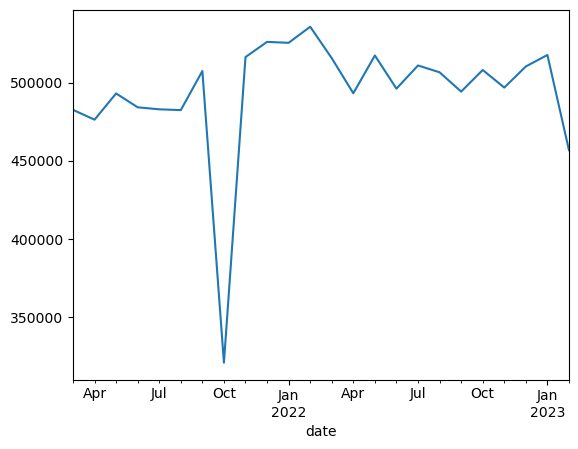

In [118]:
# Traçage du graphique ca par mois
monthly_ca.plot()
plt.show()

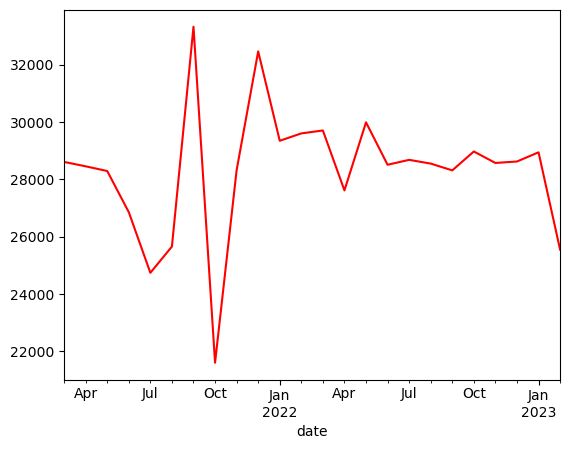

In [119]:
# Traçage du graphique nombre de ventes par mois
monthly_sales.plot(color="red")
plt.show()

Pour les ventes comme pour le Ca, on constate une chute importante pour le mois d'octobre 2021 qu'il va nous falloir investiguer

### Chiffre d'affaires par catégorie

In [120]:
# Calcul du chiffre d'affaires mensuel par catégorie
monthly_ca_by_categ = df.groupby(['categ', pd.Grouper(freq='M')])['price'].sum().unstack(level=0)

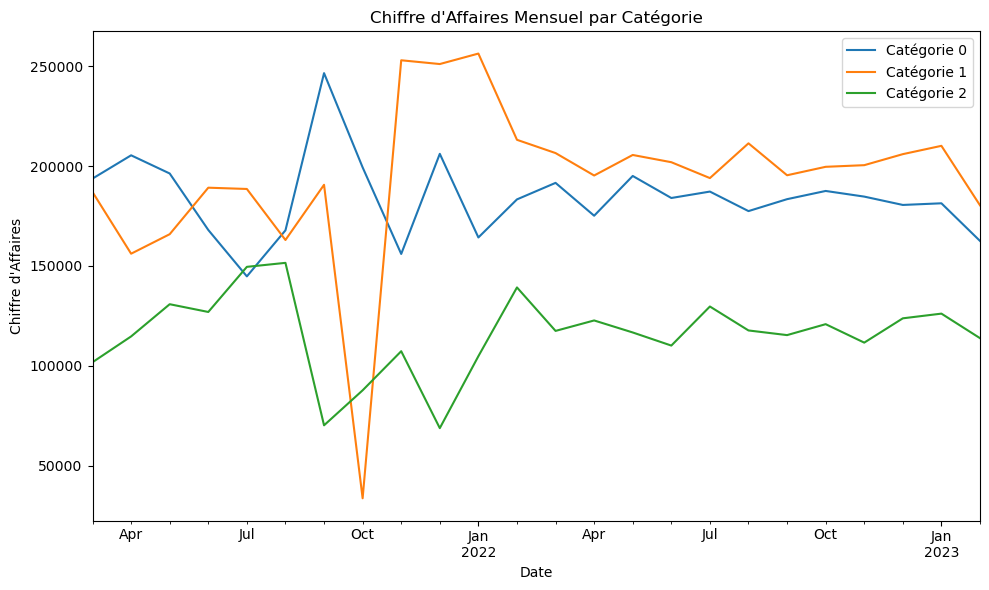

In [121]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

# Traçage des courbes pour chaque catégorie
for column in monthly_ca_by_categ.columns:
    monthly_ca_by_categ[column].plot(label=f'Catégorie {column}')

# Ajout des labels et de la légende
plt.title('Chiffre d\'Affaires Mensuel par Catégorie')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'Affaires')
plt.legend()
plt.tight_layout()
plt.show()

On constate que le décroché de octobre 2021 est principalement dut à une chute du Ca de la catégorie 1, avant une remontée encore plus importante le mois suivant.
Nous allons donc étudier de plus près ce mois d'octobre 2021

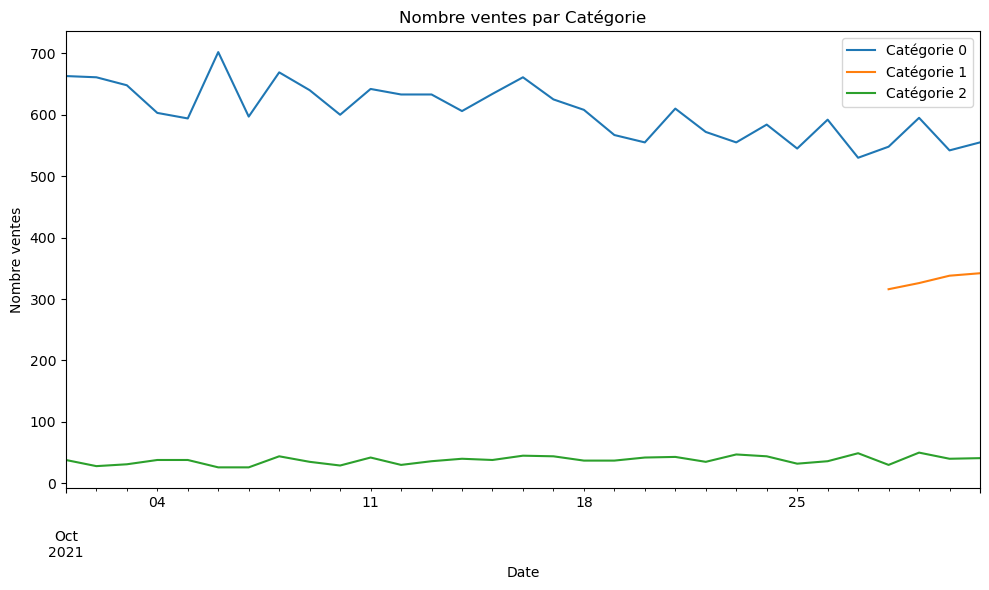

In [122]:
# Calcul des ventes journalière par catégorie pour la periode de octobre 2021
# Filtre des données pour la période de octobre 2021
start_date = '2021-10-01'
end_date = '2021-10-31'
filtered_df = df.loc[start_date:end_date]
dayly_sales_by_categ = filtered_df.groupby(['categ', pd.Grouper(freq='D')])['price'].count().unstack(level=0)

# Tracer les courbes
plt.figure(figsize=(10, 6))

# Traçage des courbes pour chaque catégorie
for column in dayly_sales_by_categ.columns:
    dayly_sales_by_categ[column].plot(label=f'Catégorie {column}')

# Ajout des labels et de la légende
plt.title('Nombre ventes par Catégorie')
plt.xlabel('Date')
plt.ylabel('Nombre ventes')
plt.legend()
plt.tight_layout()
plt.show()

On constate qu'aucun livre de la catégorie 1 n'a été vendu entre du 1er au 27 Octobre. On soupçonne une interuption dans le pipeline de données.
Il est nécessaire de contacter les responsables des ventes, les équipes techniques ou les administrateurs de systèmes pour confirmer s'ils ont connaissance de tout problème durant cette période.
Nous faisons le choix d'implémenter ces données manquantes pour ne pas fausser nos analyses

### Imputation des valeurs manquantes avec iterative imputer

In [123]:
# Calcul du chiffre d'affaires journalier par catégorie
dayly_ca_by_categ = df.groupby(['categ', pd.Grouper(freq='D')])['price'].sum().unstack(level=0)
dayly_ca_by_categ

categ,0,1,2
date,,,
2021-03-01,6272.64,6811.53,3491.04
2021-03-02,6728.26,5627.15,3141.03
2021-03-03,6121.03,5691.41,3386.25
2021-03-04,5891.48,6098.98,3205.61
2021-03-05,5975.97,7071.21,4424.19
...,...,...,...
2023-02-24,6197.92,5471.07,3538.90
2023-02-25,4942.69,8050.61,2767.95
2023-02-26,5522.90,7009.09,3772.73


In [124]:
# Création d'une copie des données pour l'imputation
dayly_ca_by_categ_imputed = dayly_ca_by_categ.copy()

# Liste des estimateurs à tester dans l'imputer
estimators = [
    ('DecisionTree', DecisionTreeRegressor(max_depth=10)),
    ('LinearRegression', LinearRegression()),
    ('RandomForest', RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42))
]

# Définir le nombre de splits pour la validation croisée temporelle
tscv = TimeSeriesSplit(n_splits=5)

# Imputation simple des valeurs manquantes dans la colonne '1'
simple_imputer = SimpleImputer(strategy='median')
y = simple_imputer.fit_transform(dayly_ca_by_categ_imputed[[1]]).ravel()

# Boucle pour tester chaque estimateur
for name, estimator in estimators:
    # Créer une pipeline avec l'IterativeImputer et le modèle final
    pipeline = Pipeline(steps=[
        ('imputer', IterativeImputer(estimator=estimator, max_iter=50, tol=1e-4, initial_strategy='median', random_state=0)),
        ('model', LinearRegression())
    ])

    # Effectuer la validation croisée et calculer la performance
    X = dayly_ca_by_categ_imputed.values

    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=tscv)
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    print(f"{name} Imputer: Mean MSE = {-mean_score:.4f}, Std MSE = {std_score:.4f}")

c:\Users\mrgxl\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


DecisionTree Imputer: Mean MSE = 34038.7348, Std MSE = 52213.4465
LinearRegression Imputer: Mean MSE = 22200.6232, Std MSE = 39638.3163
RandomForest Imputer: Mean MSE = 25937.4366, Std MSE = 46353.2493


In [125]:
# Initialisation de l'IterativeImputer
imputer = IterativeImputer(
    estimator=LinearRegression(),
    tol=1e-4,
    initial_strategy='median',
    imputation_order='ascending',
    min_value=0,
    random_state=0
)

# Application de l'imputation sur les colonnes de catégories
df_imputed = dayly_ca_by_categ.copy()
df_imputed[:] = imputer.fit_transform(dayly_ca_by_categ)

# Afficher les données après imputation pour la période du 2 au 27 octobre 2021
print("\nDonnées après imputation :")
print(df_imputed.loc['2021-10-02':'2021-10-27'])


Données après imputation :
categ             0            1        2
date                                     
2021-10-02  7141.01  7129.719796  2041.12
2021-10-03  6786.57  7188.949558  2206.48
2021-10-04  6553.58  6993.530879  2746.08
2021-10-05  6357.91  6920.075538  3032.55
2021-10-06  7546.58  7011.798962  1944.11
2021-10-07  6404.01  7578.050901  1787.07
2021-10-08  7069.53  6563.342061  3137.82
2021-10-09  6808.69  6956.551445  2616.67
2021-10-10  6490.98  7243.628249  2334.67
2021-10-11  7005.40  6542.829346  3225.16
2021-10-12  6706.97  7191.067525  2264.18
2021-10-13  6760.40  6949.599008  2666.82
2021-10-14  6422.39  6884.868564  3047.39
2021-10-15  6707.07  6953.045288  2701.75
2021-10-16  6898.14  6530.471317  3330.88
2021-10-17  6492.60  6845.536975  3065.38
2021-10-18  6376.43  7089.179901  2707.29
2021-10-19  5805.69  7270.248177  2816.00
2021-10-20  5912.76  7060.712036  3118.42
2021-10-21  6438.85  6831.413608  3132.94
2021-10-22  6051.86  7384.196220  2416.00
2021-1

In [126]:
 # Resampler les données par mois et calculer la somme du chiffre d'affaires par catégorie
ca_par_mois = df_imputed.resample('M').sum()

### Comparaison de la courbe d'origine et celle du Df imputé

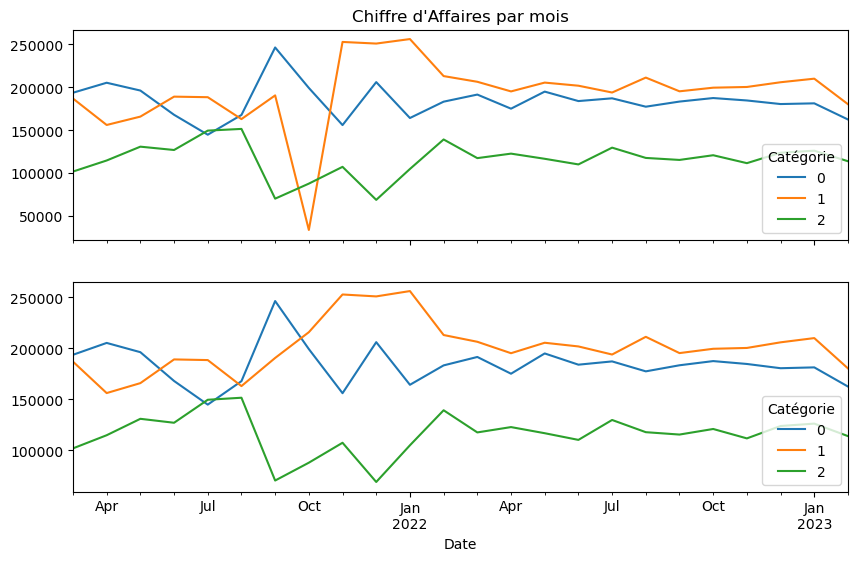

In [127]:
# Traçage des courbes avec subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Premier subplot : Chiffre d'affaires mensuel par catégorie
monthly_ca_by_categ.plot(ax=ax[0])

# Deuxième subplot : Chiffre d'affaires imputé
ca_par_mois.plot(ax=ax[1])

ax[0].set_title('Chiffre d\'Affaires par mois')
ax[1].set_xlabel('Date')


# Placer la légende sur le graphique
ax[0].legend(title='Catégorie', bbox_to_anchor=(1, 0), loc='lower right')
ax[1].legend(title='Catégorie', bbox_to_anchor=(1, 0), loc='lower right')
plt.show()

### Moyenne mobile et ewm avec le Df imputé

In [128]:
# Calcul du CA Total Mensuel
monthly_total_ca = df_imputed.resample('M').sum().sum(axis=1)

In [129]:
# Exclusion de février et mars 2023
# Conversion de l'index en DataFrame temporaire pour filtrage
dates = pd.DataFrame(index=monthly_total_ca.index)
dates['Year'] = dates.index.year
dates['Month'] = dates.index.month

# Filtre pour exclure février et mars 2023
filtered_dates = dates[~((dates['Year'] == 2023) & (dates['Month'].isin([2, 3])))]
filtered_index = filtered_dates.index

# Application du filtrage aux données
monthly_total_ca = monthly_total_ca[filtered_index]

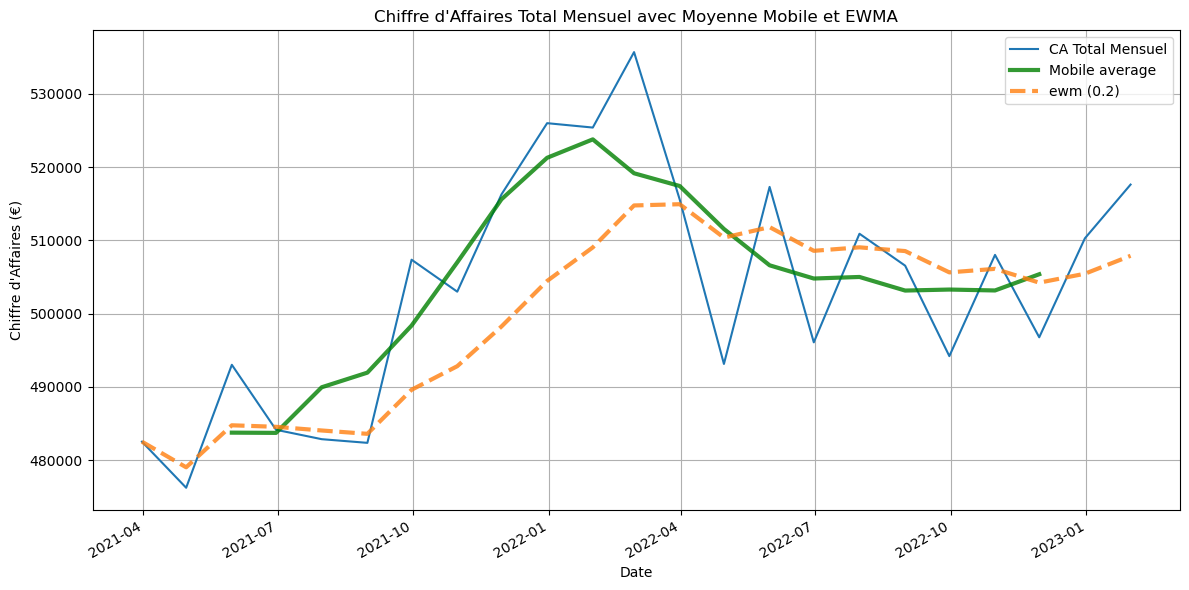

In [130]:

# Tracer les courbes
plt.figure(figsize=(12, 6))

# Tracer le CA Total Mensuel
plt.plot(monthly_total_ca.index, monthly_total_ca, label='CA Total Mensuel', linestyle='-')

# Tracer la Moyenne Mobile
monthly_total_ca.rolling(window=5, center=True).mean().plot(label='Mobile average', lw=3, ls='-',c='g', alpha=0.8)
# Tracer l'Exponential Weighted Moving Average (EWMA)
monthly_total_ca.ewm(alpha=0.2).mean().plot(label='ewm (0.2)', lw=3, ls='--', alpha=0.8)


# Ajouter des labels et la légende
plt.title('Chiffre d\'Affaires Total Mensuel avec Moyenne Mobile et EWMA')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'Affaires (€)')
plt.legend()
plt.tight_layout()
plt.grid(True)
# Sauvegarde du graphique
plt.savefig("Ca total moyenne mobile.png")


plt.show()

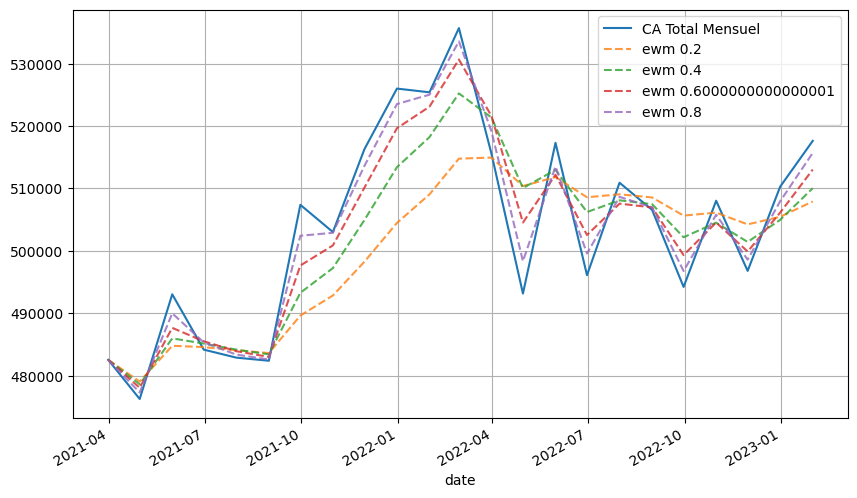

In [131]:
# Traçage du lissage ewm avec différents alpha
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_ca.index, monthly_total_ca, label='CA Total Mensuel', linestyle='-')
for i in np.arange(0.2, 1, 0.2):
    monthly_total_ca.ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)
    plt.legend()
plt.grid(True)
plt.show()


## 4.2 Analyse des ventes

### Imputation des valeurs manquantes sur le nombre de ventes

In [132]:
# Calcul du nombre de vente journalier par catégorie
dayly_sales_by_categ = df.groupby(['categ', pd.Grouper(freq='D')])['price'].count().unstack(level=0)
dayly_sales_by_categ

categ,0,1,2
date,,,
2021-03-01,582.0,335.0,46.0
2021-03-02,621.0,276.0,43.0
2021-03-03,591.0,280.0,40.0
2021-03-04,563.0,297.0,43.0
2021-03-05,561.0,331.0,51.0
...,...,...,...
2023-02-24,576.0,271.0,47.0
2023-02-25,458.0,401.0,46.0
2023-02-26,508.0,329.0,53.0


In [133]:
# Création d'une copie des données pour l'imputation
dayly_sales_by_categ_imputed = dayly_sales_by_categ.copy()

# Liste des estimateurs à tester dans l'imputer
estimators = [
    ('DecisionTree', DecisionTreeRegressor(max_depth=10)),
    ('LinearRegression', LinearRegression()),
    ('RandomForest', RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42))
]

# Définir le nombre de splits pour la validation croisée temporelle
tscv = TimeSeriesSplit(n_splits=5)

# Imputation simple des valeurs manquantes dans la colonne '1'
simple_imputer = SimpleImputer(strategy='median')
y = simple_imputer.fit_transform(dayly_sales_by_categ_imputed[[1]]).ravel()

# Boucle pour tester chaque estimateur
for name, estimator in estimators:
    # Créer une pipeline avec l'IterativeImputer et le modèle final
    pipeline = Pipeline(steps=[
        ('imputer', IterativeImputer(estimator=estimator, max_iter=50, tol=1e-4, initial_strategy='median', random_state=0)),
        ('model', LinearRegression())
    ])

    # Effectuer la validation croisée et calculer la performance
    X = dayly_sales_by_categ_imputed.values

    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=tscv)
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    print(f"{name} Imputer: Mean MSE = {-mean_score:.4f}, Std MSE = {std_score:.4f}")

c:\Users\mrgxl\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


DecisionTree Imputer: Mean MSE = 86.3055, Std MSE = 127.4956
LinearRegression Imputer: Mean MSE = 52.6859, Std MSE = 94.8627
RandomForest Imputer: Mean MSE = 65.7442, Std MSE = 115.1920


In [134]:
# Initialisation de l'IterativeImputer
imputer = IterativeImputer(
    estimator=LinearRegression(),
    tol=1e-4,
    initial_strategy='median',
    imputation_order='ascending',
    min_value=0,
    random_state=0
)

# Application de l'imputation sur les colonnes de catégories
df_sales_imputed = dayly_sales_by_categ.copy()
df_sales_imputed[:] = imputer.fit_transform(dayly_sales_by_categ)

# Afficher les données après imputation pour la période du 2 au 27 octobre 2021
print("\nDonnées après imputation :")
print(df_sales_imputed.loc['2021-10-02':'2021-10-27'])


Données après imputation :
categ           0           1     2
date                               
2021-10-02  661.0  347.519678  28.0
2021-10-03  648.0  344.324821  31.0
2021-10-04  603.0  340.169626  38.0
2021-10-05  594.0  342.194302  38.0
2021-10-06  702.0  342.375747  26.0
2021-10-07  597.0  365.996967  26.0
2021-10-08  669.0  313.083222  44.0
2021-10-09  640.0  337.965347  35.0
2021-10-10  600.0  359.202686  29.0
2021-10-11  642.0  323.236844  42.0
2021-10-12  633.0  349.739077  30.0
2021-10-13  633.0  337.500298  36.0
2021-10-14  606.0  335.415141  40.0
2021-10-15  634.0  333.195741  38.0
2021-10-16  661.0  312.843138  45.0
2021-10-17  625.0  322.981639  44.0
2021-10-18  608.0  341.084602  37.0
2021-10-19  567.0  350.308126  37.0
2021-10-20  555.0  342.808712  42.0
2021-10-21  610.0  328.395895  43.0
2021-10-22  572.0  353.262899  35.0
2021-10-23  555.0  332.609729  47.0
2021-10-24  584.0  332.205163  44.0
2021-10-25  545.0  365.456317  32.0
2021-10-26  592.0  346.723822  36.0


### Indicateur du nombre de ventes par mois

In [135]:
monthly_total_sales = df_sales_imputed.resample('M').sum().sum(axis=1)
monthly_total_sales

date
2021-03-31    28610.000000
2021-04-30    28457.000000
2021-05-31    28293.000000
2021-06-30    26857.000000
2021-07-31    24742.000000
2021-08-31    25659.000000
2021-09-30    33326.000000
2021-10-31    30440.753774
2021-11-30    28321.000000
2021-12-31    32464.000000
2022-01-31    29348.000000
2022-02-28    29605.000000
2022-03-31    29707.000000
2022-04-30    27616.000000
2022-05-31    29991.000000
2022-06-30    28511.000000
2022-07-31    28682.000000
2022-08-31    28552.000000
2022-09-30    28315.000000
2022-10-31    28974.000000
2022-11-30    28574.000000
2022-12-31    28625.000000
2023-01-31    28945.000000
2023-02-28    25552.000000
Freq: M, dtype: float64

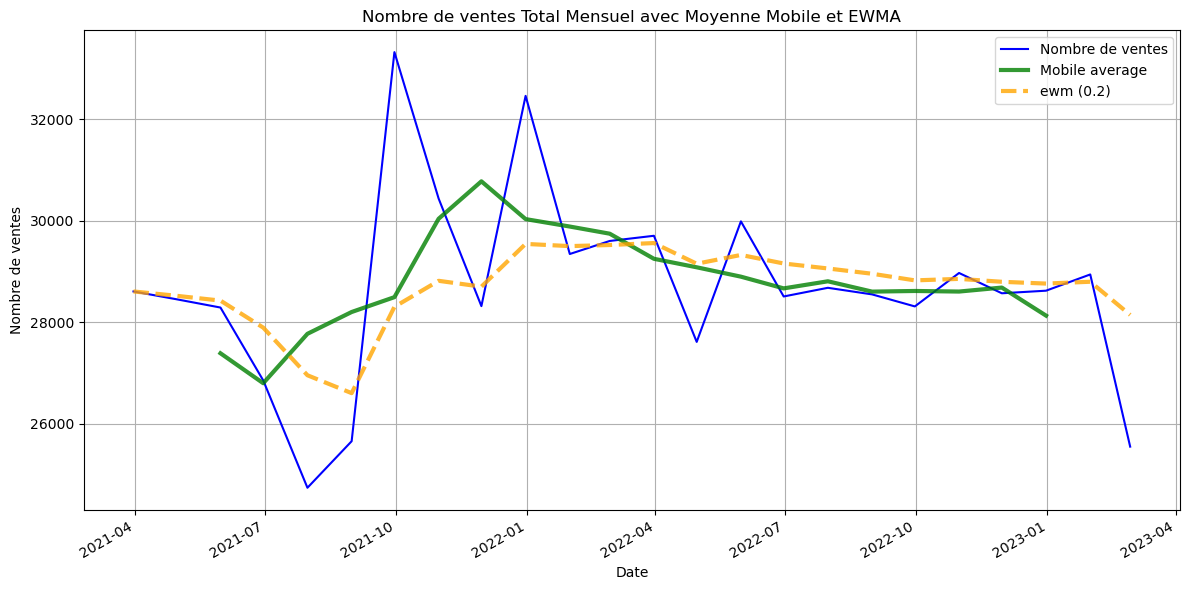

In [136]:
# Tracer les courbes
plt.figure(figsize=(12, 6))

# Tracer les ventes Total Mensuel
plt.plot(monthly_total_sales.index, monthly_total_sales.values, linestyle='-', color='b', label='Nombre de ventes')

# Tracer la Moyenne Mobile
monthly_total_sales.rolling(window=5, center=True).mean().plot(label='Mobile average', lw=3, ls='-',c='g', alpha=0.8)
# Tracer l'Exponential Weighted Moving Average (EWMA)
monthly_total_sales.ewm(alpha=0.2).mean().plot(label='ewm (0.2)', c='orange', lw=3, ls='--', alpha=0.8)


# Ajouter des labels et la légende
plt.title('Nombre de ventes Total Mensuel avec Moyenne Mobile et EWMA')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.legend()
plt.tight_layout()
plt.grid(True)
# Sauvegarde du graphique
plt.savefig("Nombre de ventes moyenne mobile.png")
plt.show()

### Indicateur du nombre de clients par mois

In [137]:
dayly_customers_by_categ = df.groupby(['categ', pd.Grouper(freq='D')])['client_id'].nunique().unstack(level=0)
dayly_customers_by_categ

categ,0,1,2
date,,,
2021-03-01,287.0,249.0,36.0
2021-03-02,296.0,207.0,38.0
2021-03-03,285.0,206.0,33.0
2021-03-04,282.0,222.0,35.0
2021-03-05,291.0,247.0,43.0
...,...,...,...
2023-02-24,277.0,213.0,35.0
2023-02-25,243.0,267.0,38.0
2023-02-26,271.0,246.0,40.0


In [138]:
# Création d'une copie des données pour l'imputation
dayly_customers_by_categ_imputed = dayly_customers_by_categ.copy()

# Liste des estimateurs à tester dans l'imputer
estimators = [
    ('DecisionTree', DecisionTreeRegressor(max_depth=10)),
    ('LinearRegression', LinearRegression()),
    ('RandomForest', RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42))
]

# Définir le nombre de splits pour la validation croisée temporelle
tscv = TimeSeriesSplit(n_splits=5)

# Imputation simple des valeurs manquantes dans la colonne '1'
simple_imputer = SimpleImputer(strategy='median')
y = simple_imputer.fit_transform(dayly_customers_by_categ_imputed[[1]]).ravel()

# Boucle pour tester chaque estimateur
for name, estimator in estimators:
    # Créer une pipeline avec l'IterativeImputer et le modèle final
    pipeline = Pipeline(steps=[
        ('imputer', IterativeImputer(estimator=estimator, max_iter=50, tol=1e-4, initial_strategy='median', random_state=0)),
        ('model', LinearRegression())
    ])

    # Effectuer la validation croisée et calculer la performance
    X = dayly_customers_by_categ_imputed.values

    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=tscv)
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    print(f"{name} Imputer: Mean MSE = {-mean_score:.4f}, Std MSE = {std_score:.4f}")

c:\Users\mrgxl\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


DecisionTree Imputer: Mean MSE = 30.8494, Std MSE = 53.7147
LinearRegression Imputer: Mean MSE = 20.3171, Std MSE = 38.5062
RandomForest Imputer: Mean MSE = 26.2449, Std MSE = 48.5284


In [139]:
# Implémentation valeurs manquantes
# Initialisation de l'IterativeImputer
imputer = IterativeImputer(
    estimator=LinearRegression(),
    tol=1e-4,
    initial_strategy='median',
    imputation_order='ascending',
    min_value=0,
    random_state=0
)

# Application de l'imputation sur les colonnes de catégories
df_customers_imputed = dayly_customers_by_categ.copy()
df_customers_imputed[:] = imputer.fit_transform(dayly_customers_by_categ)

# Afficher les données après imputation pour la période du 2 au 27 octobre 2021
print("\nDonnées après imputation :")
print(df_customers_imputed.loc['2021-10-02':'2021-10-27'])


Données après imputation :
categ           0           1     2
date                               
2021-10-02  300.0  251.753280  25.0
2021-10-03  302.0  246.858009  28.0
2021-10-04  301.0  242.839839  31.0
2021-10-05  313.0  232.147205  36.0
2021-10-06  315.0  250.241463  23.0
2021-10-07  286.0  255.846420  25.0
2021-10-08  304.0  231.904818  38.0
2021-10-09  299.0  249.171956  27.0
2021-10-10  295.0  251.778270  26.0
2021-10-11  309.0  233.316674  36.0
2021-10-12  310.0  248.829608  25.0
2021-10-13  298.0  240.843249  33.0
2021-10-14  280.0  248.979549  31.0
2021-10-15  300.0  238.821669  34.0
2021-10-16  306.0  229.883238  39.0
2021-10-17  293.0  239.431394  35.0
2021-10-18  305.0  240.233525  32.0
2021-10-19  277.0  254.167187  28.0
2021-10-20  278.0  243.816901  35.0
2021-10-21  305.0  237.359834  34.0
2021-10-22  282.0  248.394815  31.0
2021-10-23  293.0  237.994548  36.0
2021-10-24  295.0  244.594042  31.0
2021-10-25  288.0  252.387994  27.0
2021-10-26  302.0  245.421163  29.0


In [140]:
monthly_total_customers = df_customers_imputed.resample('M').sum().sum(axis=1)
monthly_total_customers

date
2021-03-31    16865.000000
2021-04-30    16170.000000
2021-05-31    16452.000000
2021-06-30    16420.000000
2021-07-31    15998.000000
2021-08-31    15848.000000
2021-09-30    17539.000000
2021-10-31    17651.262457
2021-11-30    17627.000000
2021-12-31    18688.000000
2022-01-31    17971.000000
2022-02-28    17201.000000
2022-03-31    17459.000000
2022-04-30    16517.000000
2022-05-31    17571.000000
2022-06-30    16812.000000
2022-07-31    17200.000000
2022-08-31    17169.000000
2022-09-30    16663.000000
2022-10-31    17149.000000
2022-11-30    16785.000000
2022-12-31    17144.000000
2023-01-31    17387.000000
2023-02-28    15272.000000
Freq: M, dtype: float64

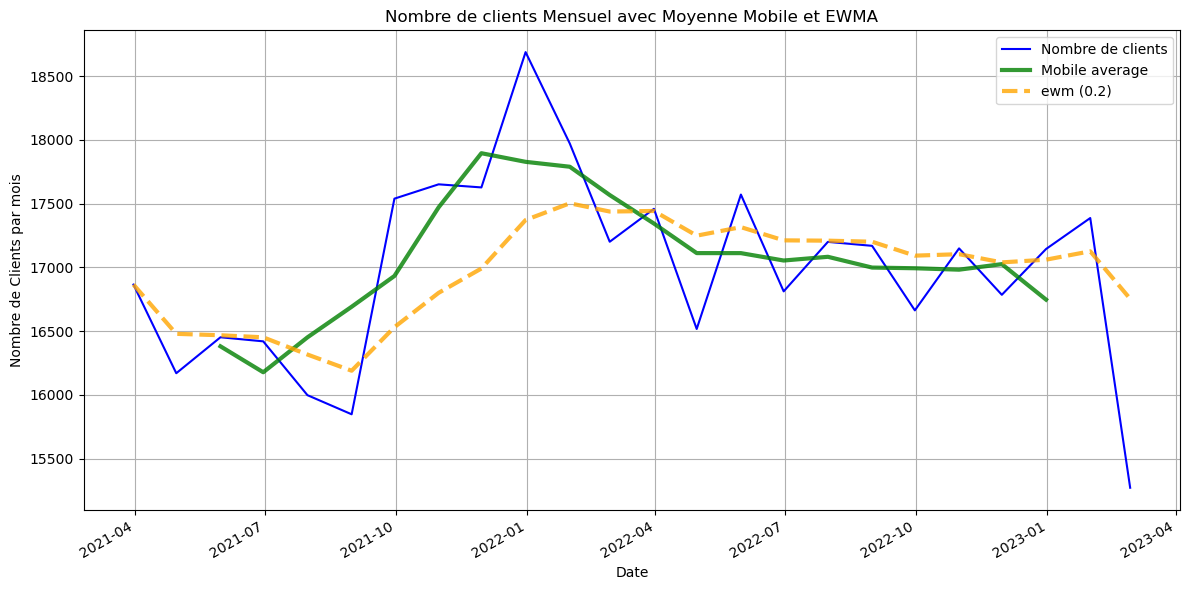

In [141]:

# Tracer les courbes
plt.figure(figsize=(12, 6))

# Tracer les clients Total Mensuel
plt.plot(monthly_total_customers.index, monthly_total_customers.values, linestyle='-', color='b', label='Nombre de clients')

# Tracer la Moyenne Mobile
monthly_total_customers.rolling(window=5, center=True).mean().plot(label='Mobile average', lw=3, ls='-',c='g', alpha=0.8)
# Tracer l'Exponential Weighted Moving Average (EWMA)
monthly_total_customers.ewm(alpha=0.2).mean().plot(label='ewm (0.2)', c='orange', lw=3, ls='--', alpha=0.8)


# Ajouter des labels et la légende
plt.title('Nombre de clients Mensuel avec Moyenne Mobile et EWMA')
plt.xlabel('Date')
plt.ylabel('Nombre de Clients par mois')
plt.legend()
plt.tight_layout()
plt.grid(True)
# Sauvegarde du graphique
plt.savefig("Nombre de clients moyenne mobile.png")
plt.show()


In [142]:
# Exclusion de février et mars 2023
# Conversion de l'index en DataFrame temporaire pour filtrage
dates = pd.DataFrame(index=monthly_total_ca.index)
dates['Year'] = dates.index.year
dates['Month'] = dates.index.month

# Filtre pour exclure février et mars 2023
filtered_dates = dates[~((dates['Year'] == 2023) & (dates['Month'].isin([2, 3])))]
filtered_index = filtered_dates.index

# Application du filtrage aux données
monthly_total_customers = monthly_total_customers[filtered_index]
monthly_total_sales=monthly_total_sales[filtered_index]

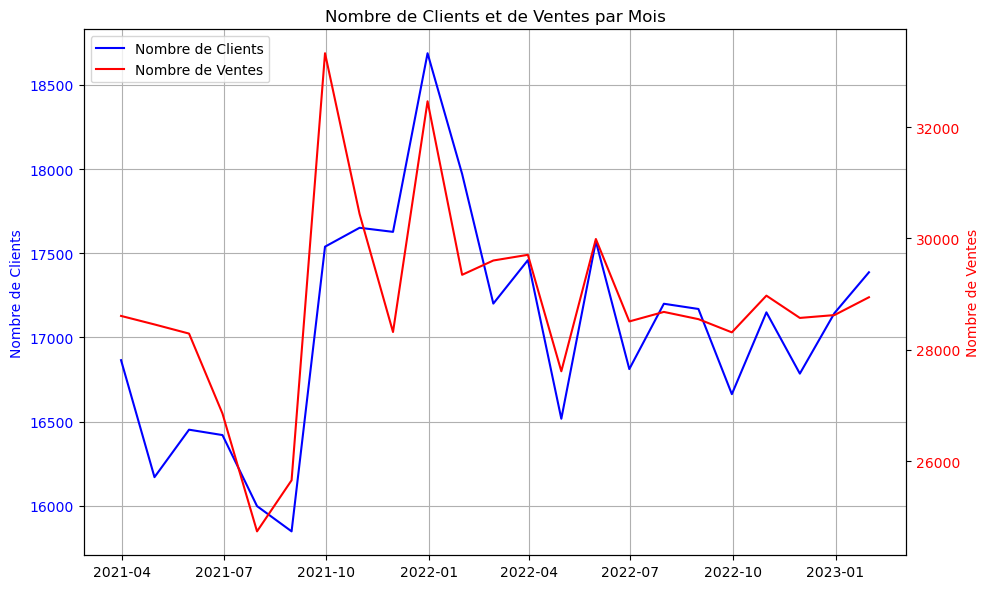

In [143]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer le nombre de clients par mois
ax1.plot(monthly_total_customers.index, monthly_total_customers.values, linestyle='-', color='b', label='Nombre de Clients')
ax1.set_ylabel('Nombre de Clients', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax1.set_title('Nombre de Clients et de Ventes par Mois')

# Ajouter un deuxième axe y pour le nombre de ventes
ax2 = ax1.twinx()
ax2.plot(monthly_total_sales.index, monthly_total_sales.values, linestyle='-', color='r', label='Nombre de Ventes')
ax2.set_ylabel('Nombre de Ventes', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(False)


# Ajouter des légendes

# Ajouter des légendes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.xticks(rotation=45)  # Rotation des labels de l'axe x pour une meilleure lisibilité
plt.tight_layout()  # Ajuste le layout pour éviter les chevauchements
plt.savefig("Nombre de Clients et ventes par mois.png")
plt.show()

On constate la forte saisonnalité de ces deux courbes qui sont fortement influencées par les sortie littéraire comme la rentrée littéraire en septembre, les fêtes de fin d'annnées, et les vacances d'été

## 4.3 Analyse des prix

In [ ]:
# Distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price',bins=50, kde=True)

plt.title('Distribution des prix', fontsize=15)
plt.xlabel('Prix', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.9)
plt.xticks(fontsize=10)

plt.show()

In [ ]:
# Statistiques
df['price'].describe()

Les prix varient entre 0.62 et 300 €, avec une moyenne de 17.45 et un écart type de 18.32. 
Le prix médian est de 13.99 €

In [ ]:
# Affichage du coeff de variation et du skewness
Coeff_variation_price = df['price'].std()/df['price'].mean()
Skewness_price = df['price'].skew()
print('Le coefficient de variation est de',round(Coeff_variation_price,2),'et le skewness empirique de',round(Skewness_price,2) )

La distribution des prix est largement dispersée et fortement asymétrique vers la droite.

### Distribution des prix par catégorie

In [ ]:
plt.figure(figsize=(10, 6))

# Liste des catégories uniques
categories = df['categ'].unique()

# Boucle sur chaque catégorie pour tracer les histogrammes
for cat in categories:
    subset = df.loc[df['categ'] == cat,:]
    sns.kdeplot(subset['price'], fill=True, label=f'Categorie {cat}')

# Ajouter des labels, un titre et une légende
plt.xlabel('Prix')
plt.title('Distribution des prix par catégorie')
plt.legend(title='Catégorie')
plt.savefig('Distribution des prix par catégorie.png')
# Afficher le graphique
plt.show()

In [ ]:
# Statistiques des prix pour chaque catégorie
desc_stats = df.groupby('categ')['price'].describe()
desc_stats

| Catégorie | Moyenne     | Minimum | Maximum |
|-----------|-------------|---------|---------|
| 0         | 10.64       | 0.62    | 40.99   |
| 1         | 20.49       | 2.00    | 80.99   |
| 2         | 76.21       | 30.99   | 300.00  |


## 4.4 Analyse des références

In [ ]:
df

In [ ]:
# Filtrer les données de catégorie 1
df_categ1 = df[df['categ'] == 1]
# Calculer le nombre de ventes par référence pour les autres mois
sales_by_ref_other_months = df_categ1.groupby('id_prod')['price'].count()

# Calculer le total des ventes pour toutes les références pour les autres mois
total_sales_other_months = sales_by_ref_other_months.sum()
# Calculer le poids de chaque référence
weights_by_ref = sales_by_ref_other_months / total_sales_other_months

# Calculer le nombre de ventes imputées pour la catégorie 1 en octobre 2021
df_sales_imputed_categ1=df_sales_imputed[1]
sales_categ1_october = df_sales_imputed_categ1.loc['2021-10-02':'2021-10-27'].sum()

# Distribuer les ventes imputées proportionnellement aux poids des références
imputed_sales_by_ref = round(weights_by_ref * sales_categ1_october)

# Ajouter les ventes imputées aux ventes réelles
total_sales_by_ref_categ_1 = sales_by_ref_other_months.copy()
for ref, imputed_sales in imputed_sales_by_ref.items():
    if ref in total_sales_by_ref_categ_1:
        total_sales_by_ref_categ_1[ref] += imputed_sales
    else:
        total_sales_by_ref_categ_1[ref] = imputed_sales

In [ ]:
# Calculer les ventes totales par référence pour chaque catégorie
total_sales_by_ref_categ_0 = df[df['categ'] == 0].groupby('id_prod')['price'].count()
total_sales_by_ref_categ_2 = df[df['categ'] == 2].groupby('id_prod')['price'].count()

# Concaténer les ventes totales pour toutes les catégories
total_sales_by_ref = pd.concat([
    total_sales_by_ref_categ_0,
    total_sales_by_ref_categ_1,
    total_sales_by_ref_categ_2
], axis=0)
total_sales_by_ref

### Top 10 des ventes

In [ ]:
# Trier les références par nombre total de ventes en ordre décroissant et sélectionner les 10 premières
top_10_references = total_sales_by_ref.sort_values(ascending=False).head(10)

# Afficher les résultats
print(top_10_references)

In [ ]:
# Représentation graphique du top10 références par nombre de vente
plt.figure(figsize=(10, 6))
bars = top_10_references.plot(kind='bar', color='skyblue')
plt.title('Top 10 Références par nombre de ventes')
plt.xlabel('Référence')
plt.ylabel('Nombre de ventes Total')
plt.xticks(rotation=0)
# Ajouter les valeurs dans les barres
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,  # Position horizontale
        height*9/10,  # Position verticale
        f'{height:,}',  # Valeur avec séparation des milliers
        ha='center',  # Alignement horizontal
        va='bottom',  # Alignement vertical
        color='black'  # Couleur du texte
    )

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Flop 10 références par nombre de ventes

In [ ]:
# Trier les références par nombre total de ventes en ordre croissant et sélectionner les 10 premières
flop_20_references = total_sales_by_ref.sort_values().head(20)

# Afficher les résultats
print(flop_20_references)

Nous avons étendu le classement pour constater que 18 références n'ont qu'une seule vente.
Pour rappel nous avions écarté de notre Df les 21 produits n'ayant réalisés aucune vente.

### Top 10 références Ca

In [ ]:
# Calcul du prix de chaque référence categ 1
price_by_ref_unique_categ_1 = df_categ1.groupby('id_prod')['price'].unique()
price_by_ref_categ_1 = price_by_ref_unique_categ_1.apply(lambda x: x[0])
price_by_ref_categ_1

In [ ]:
# Calcul du ca total de chaque référence categ 1
total_ca_by_ref_categ_1= price_by_ref_categ_1*total_sales_by_ref_categ_1
total_ca_by_ref_categ_1

In [ ]:
# Calculer du ca par référence pour chaque catégorie
total_ca_by_ref_categ_0 = df[df['categ'] == 0].groupby('id_prod')['price'].sum()
total_ca_by_ref_categ_2 = df[df['categ'] == 2].groupby('id_prod')['price'].sum()

# Concaténer les ca pour toutes les catégories
total_ca_by_ref = pd.concat([
    total_ca_by_ref_categ_0,
    total_ca_by_ref_categ_1,
    total_ca_by_ref_categ_2
], axis=0)
total_ca_by_ref

In [ ]:
# Trier les références par ca en ordre décroissant et sélectionner les 10 premières
ca_top_10_references = total_ca_by_ref.sort_values(ascending=False).head(10)

# Afficher les résultats
print(ca_top_10_references)

In [ ]:
ref_top10= ca_top_10_references.index.tolist()
ref_top10

In [ ]:
total_sales_by_ref=total_sales_by_ref.reset_index()
total_sales_by_ref

In [ ]:
sales_top10= total_sales_by_ref.loc[total_sales_by_ref['id_prod'].isin(ref_top10),:]
sales_top10.columns=['id_prod','total_sales']
sales_top10

In [ ]:
ca_top_10_references=ca_top_10_references.reset_index()
ca_top_10_references.columns= ['id_prod','ca']


In [ ]:
ca_top_10_references=ca_top_10_references.merge(sales_top10, on= 'id_prod')
ca_top_10_references

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot pour le chiffre d'affaires
bars = ax1.bar(ca_top_10_references['id_prod'], ca_top_10_references['ca'], color='skyblue', label='Ca Total (€)')
ax1.set_xlabel('Référence')
ax1.set_ylabel('Ca Total (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Top 10 des Références par Ca avec le Nombre de Ventes')
ax1.set_xticks(range(len(ca_top_10_references['id_prod'])))
ax1.set_xticklabels(ca_top_10_references['id_prod'], rotation=45)

# Ajouter les valeurs dans les barres
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,  # Position horizontale
        height * 9 / 10,  # Position verticale
        f'{round(height):,}'.replace(',', ' '),  # Valeur avec séparation des milliers
        ha='center',  # Alignement horizontal
        va='top',  # Alignement vertical
        color='black'  # Couleur du texte
    )

# Line plot pour le nombre de ventes
ax2 = ax1.twinx()
line = ax2.plot(ca_top_10_references['id_prod'], ca_top_10_references['total_sales'], color='green', marker='o', linestyle='-', label='Nombre de Ventes')
ax2.set_ylabel('Nombre de Ventes', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Ajouter les valeurs sur la ligne
for i, txt in enumerate(ca_top_10_references['total_sales']):
    ax2.annotate(f'{txt:,}'.replace(',', ' '), (i, txt), textcoords="offset points", xytext=(20, 7), ha='center', va='top', color='black')

# Grid and layout
fig.tight_layout()

fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.85))
plt.savefig("Top 10 Références par Ca et Nombre de Ventes.png")
plt.show()

### Flop 10 références par Ca

In [ ]:
# Trier les références par ca en ordre croissant et sélectionner les 10 premières
ca_flop_10_references = total_ca_by_ref.sort_values().head(10)

# Afficher les résultats
print(ca_flop_10_references)

On retrouve les références ayant les plus bas prix parmi le flop 20 ventes.
On constate qu'ils sont tous de la catégorie 0

### Répartition du nombre de référence par catégorie

In [ ]:
ref_by_categ = df.groupby('categ')['id_prod'].nunique()
print(f'La catégorie 0 contient {ref_by_categ[0]} références')
print(f'La catégorie 1 contient {ref_by_categ[1]} références')
print(f'La catégorie 2 contient {ref_by_categ[2]} références')

In [ ]:
# Créer un pie chart
plt.figure(figsize=(6,6))
plt.pie(ref_by_categ, labels=ref_by_categ.index, autopct='%1.0f%%', startangle=140)
plt.title('Répartition du nombre de références par catégorie')
plt.axis('equal')
plt.legend()
plt.savefig("Répartition du nombre de références par catégorie.png")
plt.show()

### Moyenne de prix par catégorie

In [ ]:
# Prix moyen par categorie
mean_price_categ = products.groupby(["categ"])["price"].mean()
print("Prix moyen d'un livre selon sa catégorie")
print(f'Catégorie 0 : {mean_price_categ[0]:,.2f} €')
print(f'Catégorie 1 : {mean_price_categ[1]:,.2f} €')
print(f'Catégorie 2 : {mean_price_categ[2]:,.2f} €')

### Répartition du nombre de ventes par catégorie

In [ ]:
# Nombre de ventes par categorie
total_sales_categ_0 = total_sales_by_ref_categ_0.sum()
total_sales_categ_1 = total_sales_by_ref_categ_1.sum()
total_sales_categ_2 = total_sales_by_ref_categ_2.sum()
print("Nombre de ventes par catégorie")
print(f'Catégorie 0 : {total_sales_categ_0} ventes')
print(f'Catégorie 1 : {total_sales_categ_1} ventes')
print(f'Catégorie 2 : {total_sales_categ_2} ventes')

In [ ]:
# Convertir les valeurs en Series
sales_data = pd.Series({
    'Catégorie 0': total_sales_categ_0,
    'Catégorie 1': total_sales_categ_1,
    'Catégorie 2': total_sales_categ_2
})

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(sales_data, labels=ref_by_categ.index, autopct='%1.0f%%', startangle=140)
plt.title('Répartition du nombre de ventes par catégorie')
plt.axis('equal')
plt.legend()
plt.savefig("Répartition du nombre de ventes par catégorie.png")
plt.show()

### Calcul du Ca par catégories

In [ ]:
# Calculer le CA total pour chaque catégorie
total_ca_by_categ = df_imputed[[0, 1, 2]].sum()
total_ca_by_categ

In [ ]:
# Créer le graphique
plt.figure(figsize=(10, 6))

# Tracer le diagramme en barres
ax = total_ca_by_categ.plot(kind='bar', color=['blue','orange' ,'green'])

# Ajouter les labels et le titre
plt.title('Chiffre d\'Affaires Total par Catégorie')
plt.xlabel(' ')
plt.ylabel('Chiffre d\'Affaires (€)')
plt.xticks(ticks=range(len(total_ca_by_categ)), labels=[f'Catégorie {i}' for i in total_ca_by_categ.index], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur chaque barre
for rect in ax.patches:
    height = rect.get_height()
    formatted_height = '{:,.0f}'.format(height).replace(',', ' ')
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height*5/6,
        formatted_height,
        ha='center',
        va='bottom',
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
# Sauvegarde du graphique
plt.savefig("Chiffre d'affaire total par catégorie.png")
plt.show()

### Répartition du Ca par catégorie

In [ ]:
print('Ca total par catégorie')

print(f'Catégorie 0 : {total_ca_by_categ[0]:,.0f}'.replace(',', ' ') + '€')
print(f'Catégorie 1 : {round(total_ca_by_categ[1]):,.0f}'.replace(',', ' ') + '€')
print(f'Catégorie 2 : {round(total_ca_by_categ[2]):,.0f}'.replace(',', ' ') + '€')

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(total_ca_by_categ, labels=ref_by_categ.index, autopct='%1.0f%%', startangle=180)
plt.title('Répartition du Ca par catégorie')
plt.axis('equal')
plt.legend()
plt.savefig("Répartition du Ca par catégorie.png")
plt.show()

## 4.5 Profil des clients

### Clients BtoB

In [ ]:
# Création d'un Df avec le nombre d'achats et le montant total par clients
sales_by_customers= df.groupby(['client_id']).agg({'session_id':'count','price':'sum'}).reset_index()
sales_by_customers.rename(columns={'session_id':'Nombre d\'achats','price':'montant total achats'}, inplace=True)
sales_by_customers_sorted = sales_by_customers.sort_values(['Nombre d\'achats'], ascending=False)
sales_by_customers_sorted


|client_id           | Nombre d'achats          | Montant total des achats en € |
|---------------------------------|---------------------------------|---------------------------------|
| c_1609 | 25 488 | 324 033 |
|c_6714|9 187|153 658|
|c_3454|6 773|113 667|
|c_4958|5 195|289 760|

Nous identifions quatre clients dont le nombre d'achat nous permet de déduire qu'il s'agit de clients BtoB (libraires, bibliothécaire) que nous allons isoler dans un Df à part.

In [ ]:
BtoB_customers = df.loc[df['client_id'].isin(['c_1609','c_6714','c_3454','c_4958'])]
BtoB_customers

In [ ]:
total_ca_BtoB= BtoB_customers['price'].sum()
print(' Le Ca total engendré par les clients BtoB est de',total_ca_BtoB, '€, soit', round(total_ca_BtoB*100/ca_total,2), '% du Ca total')

In [ ]:
BtoB_ca_categ=BtoB_customers.groupby('categ')['price'].sum()
BtoB_ca_categ

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(BtoB_ca_categ, labels=BtoB_ca_categ.index, autopct='%1.0f%%', startangle=180)
plt.title('Répartition du Ca par catégorie pour les clients BtoB')
plt.axis('equal')
plt.legend()
plt.savefig('Répartition du Ca par catégorie pour les clients BtoB.png')
plt.show()

On constate une répartition très équilibrée du Ca entre les catégories pour les clients BtoB

In [ ]:
BtoB_ca_categ_by_customers=BtoB_customers.groupby(['client_id','categ'])['price'].sum().reset_index()
BtoB_ca_categ_by_customers

In [ ]:
# Pivot pour avoir les catégories comme colonnes
df_pivot = BtoB_ca_categ_by_customers.pivot(index='client_id', columns='categ', values='price').fillna(0)

# Réinitialiser l'index pour que les client_id soient une colonne
df_pivot.reset_index(inplace=True)

# Renommer les colonnes pour plus de clarté
df_pivot.columns = ['client_id', 'Catégorie 0', 'Catégorie 1', 'Catégorie 2']

# Tracer le graphique
plt.figure(figsize=(14, 6))


# Créer un graphique à barres avec des barres côte à côte
df_pivot.plot(x='client_id', kind='bar', stacked=False)

# Ajouter des labels et un titre
plt.title('Chiffre d\'Affaires par Client BtoB et par Catégorie')
plt.xlabel('ID Client')
plt.ylabel('Chiffre d\'Affaires (€)')
plt.xticks(rotation=0)
plt.savefig('ca par categ par client BtoB.png')
# Afficher le graphique
plt.show()

### Clients particuliers

In [ ]:
# on exclu les clients BtoB pour l'analyse des clients 'lambda'
normal_customers= df.loc[~df['client_id'].isin(['c_1609','c_6714','c_3454','c_4958'])]
normal_customers

In [ ]:
# Répartition des clients par sexe
normal_customers_by_sex= normal_customers.groupby('sex')['client_id'].nunique()
normal_customers_by_sex

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(normal_customers_by_sex, labels=["Femmes","Hommes"], autopct='%1.0f%%', startangle=90)
plt.title('Répartition des clients par genre')
plt.axis('equal')
plt.savefig('Répartition des clients par genre.png')
plt.show()

### Répartition du Ca par genre

In [ ]:
# Calcul du Ca par sexe
ca_by_sex= normal_customers.groupby('sex')['price'].sum()
ca_by_sex

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(ca_by_sex, labels=["Femmes","Hommes"], autopct='%1.0f%%', startangle=90)
plt.title('Répartition du Ca par genre')
plt.axis('equal')

plt.savefig('Répartition du CA par genre.png')
plt.show()

In [ ]:
# Calcul du Ca par catégorie par sexe
ca_by_sex_by_categ= normal_customers.groupby(['sex','categ'])['price'].sum().reset_index()
ca_by_sex_by_categ

In [ ]:
# Préparation des données pour le plot
categories = df['categ'].unique()
sexes = df['sex'].unique()

bar_width = 0.35
index = np.arange(len(categories))

# Séparer les prix par sexe et catégorie
price_m = ca_by_sex_by_categ[ca_by_sex_by_categ['sex'] == 'm'].set_index('categ')['price']
price_f = ca_by_sex_by_categ[ca_by_sex_by_categ['sex'] == 'f'].set_index('categ')['price']

# Création du plot
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, price_f[categories], bar_width, label='Femmes', color='b')
bar2 = ax.bar(index + bar_width, price_m[categories], bar_width, label='Hommes', color='Orange')


ax.set_xlabel('Catégories')
ax.set_ylabel('Ca (€)')
ax.set_title('Ca par Catégorie et Sexe')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Ajouter les valeurs sur chaque barre
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}'.replace(",", " "),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', color='black')


plt.tight_layout()
plt.savefig('Ca par Catégorie et Sexe.png')
plt.show()

### Répartition par âge

In [ ]:
# On créé une colonne 'age' qui est l'âge au moment du dernier achat

normal_customers_copy = normal_customers.copy()
last_purchase_year = normal_customers_copy.groupby('client_id').apply(lambda x: x.index.year.max()).reset_index()
last_purchase_year.columns = ['client_id', 'last_purchase_year']

# Joindre l'année de la dernière transaction au DataFrame
normal_customers_copy = normal_customers_copy.merge(last_purchase_year, on='client_id')

# Calculer l'âge en utilisant l'année de la dernière transaction
normal_customers_copy['age'] = normal_customers_copy['last_purchase_year'] - normal_customers_copy['birth']


normal_customers_copy.drop(columns='last_purchase_year', inplace=True)
normal_customers_unique = normal_customers_copy.drop_duplicates(subset='client_id')



In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data=normal_customers_unique, x='age', kde=True, discrete=True, color='blue')


plt.title('Distribution des Clients par Âge', fontsize=15)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Nombre de Clients', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('Distribution des Clients par Âge.png')
plt.show()

In [ ]:
normal_customers_age=normal_customers_copy

In [ ]:
# Statistiques sur les âges
normal_customers_age['age'].describe()

La moyenne des âges est d'environ 45 ans avec un écart type de 14 ans. l'âge médian est de 44 ans. 
Les clients ont entre 17 et 94 ans.

In [ ]:
# Affichage du coeff de variation et du skewness
Coeff_variation_age = normal_customers_age['age'].std()/normal_customers_age['age'].mean()
Skewness_age = normal_customers_age['age'].skew()
print('le coefficient de variation est de',round(Coeff_variation_age,2),'et le skewness empirique de',round(Skewness_age,2) )

Les âges des clients ont une variabilité modérée, avec un coefficient de variation de 0.31, la dispersion des âges autour de la moyenne est relativement faible.
La distribution des âges est légèrement asymétrique à droite avec un skewness de 0.58. Cela indique qu'il y a quelques valeurs élevées d'âge, mais l'asymétrie n'est pas très prononcée.

## 4.6 Analyse des comportements d'achat

### Courbe de lorenz pour la répartition du Ca par client

In [ ]:
# Agréger les dépenses totales par client
total_spent_by_client = normal_customers.groupby('client_id')['price'].sum().reset_index()

# Trier les clients par dépenses croissantes
total_spent_by_client_sorted = total_spent_by_client.sort_values(by='price')

# Calculer la courbe de Lorenz
cumulative_spent = total_spent_by_client_sorted['price'].cumsum()
lorenz_curve = cumulative_spent / cumulative_spent.iloc[-1]
lorenz_curve = np.insert(lorenz_curve.values, 0, 0)  # Ajouter un point (0,0)

# Axe des x pour la courbe de Lorenz
n = len(lorenz_curve)
x = np.linspace(0.0, 1.0, n)

# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(x, lorenz_curve, drawstyle='steps-post', label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], 'k--', label='Égalité parfaite')  # Ligne d'égalité parfaite
plt.fill_between(x, x, lorenz_curve, where=(lorenz_curve > x), facecolor='lightgray', interpolate=True)

# Ajouter des labels et titre
plt.xlabel('Pourcentage cumulé de clients')
plt.ylabel('Pourcentage cumulé des dépenses')
plt.title('Courbe de Lorenz des Dépenses des Clients')
plt.legend()
plt.grid(True)
plt.savefig('Courbe de Lorenz des Dépenses des Clients.png')
plt.show()

In [ ]:
# Calcul de l'indice de Gini
gini_index = 1 - 2 * np.trapz(lorenz_curve, x)

# Afficher l'indice de Gini
print(f'Indice de Gini: {gini_index:.4f}')

 Un indice de Gini de 0.4026 montre qu'il y a une concentration significative des dépenses parmi certains clients. C'est un signe que les dépenses ne sont pas répartis de manière uniforme.

### Analyse du panier moyen

In [ ]:
#Calcul du panier moyen en montant et nombre d'achats
session_mean=normal_customers.groupby('session_id')['price'].sum().mean()
session_product=normal_customers.groupby('session_id')['price'].count().mean()
print('Le montant moyen d\'une session est de', round(session_mean,2), '€, pour',round(session_product,2), 'produits achetés')

In [ ]:
# Distribution montant panier
session_montant=normal_customers.groupby('session_id')['price'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(session_montant['price'], bins = 20, kde= True, color='blue')
plt.xlabel('Montant panier')
plt.ylabel(' ')
plt.title ('Distribution du montant panier')
plt.xlim(left=0)
plt.savefig('Distribution du montant panier.png')
plt.show()

In [ ]:
# Statistiques sur le montant du panier moyen
session_montant.describe()

Le montant panier à une moyenne de 34,37 € avec un écart type de 32,24 et une valeur médiane de 25,55.
le minimum est de 0.62 € et le max 568,88 €

In [ ]:
# Affichage du coeff de variation et du skewness
Coeff_variation_session = session_montant['price'].std()/session_montant['price'].mean()
Skewness_session = session_montant['price'].skew()
print('le coefficient de variation est de',round(Coeff_variation_session,2),'et le skewness empirique de',round(Skewness_session,2) )

les montants des paniers des clients sont très dispersés, avec une forte tendance à avoir des montants beaucoup plus élevés que la moyenne. Cela peut indiquer que, bien que de nombreux clients aient des montants de paniers relativement faibles à modérés, il y a une minorité significative de clients qui dépensent des montants exceptionnellement élevés, ce qui crée une forte asymétrie dans la distribution des montants des paniers.

# 5. Analyse des liaisons et corrélations

## 5.1 Liaison entre genre et catégorie de livre acheté

### Analyse graphique

In [ ]:
# Créer un graphique de la relation entre 'sex' et 'categ'
plt.figure(figsize=(8, 6))
sns.countplot(data=normal_customers_age, x='categ', hue='sex')
plt.xlabel('Categ')
plt.ylabel('Nombre d\'achat')
plt.title('Relation entre le sexe et la catégorie de livre acheté')
plt.show()

### Test du chi-carré (chi2)

##### Hypothèses

H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.

H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.

In [ ]:
# Créer un tableau de contingence
contingency_table = pd.crosstab(normal_customers_age['sex'], normal_customers_age['categ'])
contingency_table

In [ ]:
# Effectuer le test du chi-carré
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Afficher les résultats
print("Statistique du chi-carré :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Fréquences attendues :\n", expected_freq)

La p-valeur très faible et la statistique du chi-carré élevée montrent qu'il existe une association significative entre le sexe et la catégorie de livre acheté. Les différences entre les fréquences observées et attendues sont suffisamment grandes pour conclure que les variables ne sont pas indépendantes.
Il est nécessaire cependant de mesurer la force de cette relation avant de tirer des conclusions

### Calcul du v de cramer

Le coefficient de Cramér-V mesure la force de l'association entre deux variables qualitatives. 
Il varie entre 0 (pas d'association) et 1 (association parfaite).

In [ ]:
# Calculer le coefficient de Cramér-V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramér-V
print("Coefficient de Cramér-V :", cramer_v)

Même si les résultats du test du chi-carré sont statistiquement significatifs, la relation entre le sexe et la catégorie de livre achetée est très faible et probablement insignifiante en termes pratiques.

## 5.2 Corrélation entre l'âge et le montant total des achats

### Analyse graphique

In [ ]:
# Calcul du montant total des achats par client
customers_total_purchase=normal_customers_age.groupby('client_id')['price'].sum().reset_index()
df_corr_age_total_purchase = pd.merge(normal_customers_age[['client_id','age']],customers_total_purchase, on='client_id', how='right')
df_corr_age_total_purchase= df_corr_age_total_purchase.drop_duplicates(subset=['client_id'])
df_corr_age_total_purchase

In [ ]:
# Traçage du nuage de points
sns.scatterplot(x='age', y= 'price', data=df_corr_age_total_purchase)
plt.show()

In [ ]:
# Discrétisation des âges
# Diviser l'âge en tranches
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_corr_age_total_purchase['age_group'] = pd.cut(df_corr_age_total_purchase['age'], bins=bins, labels=labels, right=False)

# Créer des box plots par tranche d'âge
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='price', data=df_corr_age_total_purchase)
plt.title('Distribution du montant total des achats par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Montant total des achats')
plt.savefig('Distribution du montant total des achats par tranche d\'âge.png')
plt.show()


Les données montrent que le montant total des achats ne varie pas de manière significative entre les différentes tranches d'âge, bien qu'il y ait une légère augmentation pour les tranches d'âge 31-40. La présence de nombreuses valeurs aberrantes suggère que certains individus, quel que soit leur groupe d'âge, effectuent des achats beaucoup plus importants que la médiane. Cela peut indiquer des comportements d'achat individuels extrêmes au sein de chaque groupe d'âge.

### Test de Kolmogorov-Smirnov (normalité)

##### Hypothèses

H0 : les données sont distribuées selon la loi normale

H1 : les données ne sont pas distribuées selon la loi normale

In [ ]:
var1="age"
var2="price"
# Vérifier la normalité à l'aide du test de Kolmogorov-Smirnov (car n>2000)


# Si p < 0.05, on rejette H0
# Si p >= 0.05, on ne peut pas rejeter H0 et on conclut que la distribution est normale

for var in [var1, var2]:
    data = df_corr_age_total_purchase[var]
    mean = data.mean()
    std = data.std(ddof=1)
    _, p_value = kstest(data, 'norm', args=(mean, std))
    print(f"P-valeur de la normalité (Kolmogorov-Smirnov) pour {var}:", p_value)

Pour les deux variables, l'hypothèse H0 est rejetée.
Étant donné que ni l'âge ni le montant total du panier ne suivent une distribution normale, il est approprié d'utiliser des méthodes non paramétriques comme la corélation de spearman pour analyser la relation entre ces variables.

### Corrélation de Spearman

##### Hypothèses :

H0 : Il n'y a pas de corrélation monotone entre les deux variables.

H1 : Il y a une corrélation monotone entre les deux variables.

In [ ]:
spearmanr(df_corr_age_total_purchase['age'], df_corr_age_total_purchase['price'])

La corrélation entre les deux variables est significative, ce qui signifie que nous pouvons rejeter l'hypothèse nulle d'absence de corrélation.
Le coefficient de Spearman indique qu'il y a une tendance selon laquelle, lorsque l'une des variables augmente, l'autre tend à diminuer, mais cette relation est très faible et peut ne pas être très utile pour des prédictions ou des prises de décision importantes.

## 5.3 Corrélation entre l'âge et la fréquence d'achat

### Analyse graphique

In [ ]:
normal_customers_sorted=normal_customers.sort_index()

In [ ]:
# Réinitialiser l'index pour travailler avec des colonnes
normal_customers_sorted['date'] = normal_customers_sorted.index
normal_customers_sorted.reset_index(drop=True, inplace=True)
normal_customers_sorted

In [ ]:
# Grouper par 'client_id' et 'date', en gardant des dates uniques
df_unique = df.groupby(['client_id', 'date']).first().reset_index()

# Filtrer les clients avec au moins 4 dates uniques
filtered_customers = df_unique.groupby('client_id').filter(lambda x: len(x) >= 4)

# Définir 'date' comme index
filtered_customers.set_index('date', inplace=True)

# Calculer les jours entre achats pour chaque client
def calculate_intervals(group):
    group['Interval'] = group.index.to_series().diff().dt.days
    return group

interval_purchase_by_customers = filtered_customers.groupby('client_id').apply(calculate_intervals)
# Supprimer la première ligne de chaque groupe, car elle aura un intervalle NaN
interval_purchase_by_customers = interval_purchase_by_customers.dropna(subset=['Interval'])
interval_purchase_by_customers

In [ ]:
interval_purchase_by_customers.reset_index(drop=True, inplace=True)

In [ ]:
interval_purchase_by_customers

In [8]:
# Calcul de la moyenne des jours entre achats pour chaque client
average_intervals_by_customers = interval_purchase_by_customers.groupby('client_id')['Interval'].mean().reset_index()
purchase_frequency_by_customers = average_intervals_by_customers
# Calcul du nombre d'achat par mois
purchase_frequency_by_customers['frequency']= round(30/purchase_frequency_by_customers['Interval'],2)
purchase_frequency_by_customers

NameError: name 'interval_purchase_by_customers' is not defined

In [ ]:
# Jointure avec le Df des âges
df_corr_age_purchase_frequency = pd.merge(normal_customers_age[['client_id','age']],purchase_frequency_by_customers, on='client_id', how='inner')
df_corr_age_purchase_frequency = df_corr_age_purchase_frequency.drop_duplicates(subset=['client_id'])
df_corr_age_purchase_frequency

In [ ]:
# Nuage de points
sns.scatterplot(x='age', y='frequency',data=df_corr_age_purchase_frequency)
plt.show()

In [ ]:
# Discrétisation des âges
# Diviser l'âge en tranches
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_corr_age_purchase_frequency['age_group'] = pd.cut(df_corr_age_purchase_frequency['age'], bins=bins, labels=labels, right=False)

# Créer des box plots par tranche d'âge
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='frequency', data=df_corr_age_purchase_frequency)
plt.title('Distribution de la fréquence d\'achat par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre d\'achats par mois')
plt.savefig('Distribution de la fréquence d\'achat par tranche d\'âge.png')
plt.show()

##### Fréquence d'Achat Moyenne :

Les tranches d'âge 31-40, 41-50, et 51-60 ans montrent des fréquences d'achat plus élevées en moyenne comparées aux autres tranches d'âge, avec des médianes autour de 1.5.
Les tranches d'âge plus jeunes (0-20 et 21-30 ans) et plus âgées (71-80, 81-90, 91-100 ans) montrent des fréquences d'achat plus faibles avec des médianes autour de 1.

##### Dispersion des Fréquences d'Achat :

Les tranches d'âge 31-40, 41-50, et 51-60 ans montrent une plus grande dispersion des fréquences d'achat avec plusieurs valeurs aberrantes, indiquant qu'il y a des individus dans ces groupes qui achètent beaucoup plus fréquemment que la moyenne.
Les tranches d'âge plus jeunes et plus âgées montrent moins de dispersion et moins de valeurs aberrantes, suggérant une fréquence d'achat plus homogène.

##### Valeurs Aberrantes :

Les valeurs aberrantes sont plus nombreuses dans les tranches d'âge 31-40, 41-50, et 51-60 ans, indiquant que certains clients dans ces groupes achètent beaucoup plus fréquemment que leurs pairs.

### Test de Kolmogorov-Smirnov (normalité)

##### Hypothèses

H0 : les données sont distribuées selon la loi normale

H1 : les données ne sont pas distribuées selon la loi normale

In [ ]:
var1="age"
var2="frequency"

# Si p < 0.05, on rejette H0
# Si p >= 0.05, on ne peut pas rejeter H0 et on conclut que la distribution est normale

for var in [var1, var2]:
    data = df_corr_age_purchase_frequency[var]
    mean = data.mean()
    std = data.std(ddof=1)
    _, p_value = kstest(data, 'norm', args=(mean, std))
    print(f"P-valeur de la normalité (Kolmogorov-Smirnov) pour {var}:", p_value)

L'hypothèse H0 est rejetée dans les deux cas

### Corrélation de Spearman

##### Hypothèses :

H0 : Il n'y a pas de corrélation monotone entre les deux variables.

H1 : Il y a une corrélation monotone entre les deux variables.

In [ ]:
spearmanr(df_corr_age_purchase_frequency['age'], df_corr_age_purchase_frequency['frequency'])

Bien que la relation entre la fréquence d'achat et l'âge soit statistiquement significative, elle est faible. 
Il existe une légère tendance pour que les personnes achètent plus fréquemment en vieillissant, mais cette tendance n'est pas très prononcée.

## 5.4 Corrélation entre l'âge et le panier moyen

### Analyse graphique

In [ ]:
# Création d'un Df avec l'âge et le montant du panier moyen par client
session_customers_total=normal_customers.groupby(['client_id','session_id'])['price'].sum().reset_index()
customers_session_mean= session_customers_total.groupby('client_id')['price'].mean().round(2).reset_index()
df_corr_age_paniermoyen = pd.merge(normal_customers_age[['client_id','age']],customers_session_mean, on='client_id', how='right')
df_corr_age_paniermoyen= df_corr_age_paniermoyen.drop_duplicates(subset=['client_id'])
df_corr_age_paniermoyen

In [ ]:
sns.scatterplot( data=df_corr_age_paniermoyen, x= "age", y= "price")
plt.show()

In [ ]:
# Discrétisation des âges
# Diviser l'âge en tranches
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_corr_age_paniermoyen['age_group'] = pd.cut(df_corr_age_paniermoyen['age'], bins=bins, labels=labels, right=False)

# Créer des box plots par tranche d'âge
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='price', data=df_corr_age_paniermoyen,)
plt.title('Distribution du montant du panier par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Montant du panier')
plt.savefig('Distribution du montant du panier par tranche d\'âge.png')
plt.show()

Observations
Tranches d'âge 0-20 et 21-30 :

Ces tranches présentent les montants de paniers les plus élevés, avec des médianes plus élevées par rapport aux autres tranches.
Il y a une large dispersion des montants des paniers dans ces tranches d'âge, avec de nombreux points aberrants (outliers) allant jusqu'à plus de 250.

Tranches d'âge 31-40 et au-delà :

À partir de la tranche 31-40, la médiane des montants des paniers diminue significativement.
Les montants des paniers sont beaucoup moins dispersés dans ces tranches d'âge, avec des médianes et des intervalles interquartiles plus bas et plus concentrés.

Tendances générales :

Une tendance générale à la diminution du montant du panier moyen avec l'âge est visible.
Les tranches d'âge supérieures (à partir de 31-40) montrent des paniers avec des montants plus faibles et moins de dispersion, suggérant une plus grande cohérence dans les habitudes de dépenses.

Conclusion

Dépenses élevées chez les jeunes adultes : Les jeunes adultes (0-30 ans) semblent avoir des montants de panier plus élevés et plus variés. Cela peut être dû à plusieurs facteurs tels que des achats impulsifs, moins de responsabilités financières ou des préférences de consommation différentes.

Dépenses plus faibles et cohérentes chez les adultes plus âgés : Les adultes de 31 ans et plus ont tendance à dépenser moins en moyenne, et leurs montants de panier sont plus cohérents. Cela peut indiquer des habitudes d'achat plus établies, des budgets plus stricts, ou des préférences de consommation différentes.

### Test de Kolmogorov-Smirnov (normalité)

##### Hypothèses

H0 : les données sont distribuées selon la loi normale

H1 : les données ne sont pas distribuées selon la loi normale

In [ ]:
var1="age"
var2="price"

# Si p < 0.05, on rejette H0
# Si p >= 0.05, on ne peut pas rejeter H0 et on conclut que la distribution est normale

for var in [var1, var2]:
    data = df_corr_age_paniermoyen[var]
    mean = data.mean()
    std = data.std(ddof=1)
    _, p_value = kstest(data, 'norm', args=(mean, std))
    print(f"P-valeur de la normalité (Kolmogorov-Smirnov) pour {var}:", p_value)

Dans les deux cas l'hypothèse H0 est rejetée et donc ni l'âge ni le montant du panier ne suivent une distribution normale. Il est donc approprié d'utiliser des méthodes non paramétriques comme la corélation de spearman pour analyser la relation entre ces variables. 

### Corrélation de Spearman

##### Hypothèses :

H0 : Il n'y a pas de corrélation monotone entre les deux variables.

H1 : Il y a une corrélation monotone entre les deux variables.

In [ ]:
spearmanr(df_corr_age_paniermoyen['age'], df_corr_age_paniermoyen['price'])

 Le coefficient de Corrélation de Spearman indique une corrélation négative modérée à forte entre le montant du panier et l'âge des clients. En d'autres termes, lorsque l'âge des clients augmente, le montant du panier tend à diminuer, et vice versa.
La force de la corrélation est assez significative, ce qui suggère que cette relation est relativement prononcée.


La p-valeur extrêmement faible indique que la corrélation observée est statistiquement significative. 
La p-valeur de 0.0 (ou proche de zéro) confirme que le résultat est robuste et que la relation entre le montant du panier et l'âge des clients est très significative d'un point de vue statistique.

## 5.5 Liaison entre l'âge des clients et la catégorie de livre acheté

### Analyse graphique

In [ ]:
# Créer un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=normal_customers_age, x='categ', y='age',showfliers=False)
plt.xlabel('Catégorie')
plt.ylabel('Age')
plt.title('Relation entre l\'âge du client et la catégorie de livre achetée')
plt.savefig('Relation entre l\'âge du client et la catégorie de livre achetée')
plt.show()

Les livres de la catégorie 1 semblent attirer un public plus large en termes d'âge, y compris des personnes très âgées.
Les livres de la catégorie 2 attirent principalement un public jeune.
Les livres de la catégorie 0 attirent un public d'âge moyen.

In [ ]:
description_per_categ = normal_customers_age.groupby('categ')['age'].describe()

| categorie | âge moyen | écart type |
|-------|---------|------------|
| 0     | 45      | 12         |
| 1     | 49      | 16         |
| 2     | 27      | 10         |


In [ ]:
# Extraire les âges pour chaque catégorie
ages_categ_0 = normal_customers_age[normal_customers_age['categ'] == 0]['age']
ages_categ_1 = normal_customers_age[normal_customers_age['categ'] == 1]['age']
ages_categ_2 = normal_customers_age[normal_customers_age['categ'] == 2]['age']


### ANOVA

##### Hypothèses
H0 : Les moyennes de tous les groupes sont égales

H1 : Au moins une des moyennes des groupes est différente des autres.

In [ ]:
# ANOVA
anova_stat, anova_p_value = f_oneway(ages_categ_0, ages_categ_1, ages_categ_2)
print("Statistique F de l'ANOVA :", anova_stat)
print("P-valeur (ANOVA) :", anova_p_value)

La P-valeur est infèrieure à 0.05, HO est donc rejetée.

Nous allons effectuer donc un test de Levene pour vérifier l'hypothèse d'égalité des variances (homoscédasticité).

### Test de Levene pour l'égalité des variances

##### Hypothèses
H0 : Les variances de tous les groupes sont égales

H1 : Au moins une des variances des groupes est différente des autres.

In [ ]:
# Test de Levene pour l'égalité des variances
levene_stat, levene_p_value = levene(ages_categ_0, ages_categ_1, ages_categ_2)
print("Statistique W de Levene :", levene_stat)
print("P-valeur (Levene) :", levene_p_value)

H0 est rejetée, les variances ne sont pas égales entre les groupes.
Cependant comme l'on soupçonne que la variable 'age' n'est pas normalement distribuée au sein de chaque groupe, on complète l'analyse par un test de Kruskal-Wallis qui est plus approprié dans ce cas

### Test de Kolmogorov-Smirnov (normalité)

On teste si la variable 'age' est normalement distribuée dans chaque groupe.

##### Hypothèses
H0 : les données sont distribuées selon la loi normale

H1 : les données ne sont pas distribuées selon la loi normale

In [ ]:
# Test de Kolmogorov-Smirnov
def test_normality_ks(data):
    # Ajustement de la distribution normale aux données
    mu, std = norm.fit(data)
    statistic, p_value = kstest(data, 'norm', args=(mu, std))
    return statistic, p_value


results_ks_0 = test_normality_ks(ages_categ_0)
results_ks_1 = test_normality_ks(ages_categ_1)
results_ks_2 = test_normality_ks(ages_categ_2)


print("Test de Kolmogorov-Smirnov pour la catégorie 0 :")
print(f"Statistique : {results_ks_0[0]}, Valeur p : {results_ks_0[1]}")

print("Test de Kolmogorov-Smirnov pour la catégorie 1 :")
print(f"Statistique : {results_ks_1[0]}, Valeur p : {results_ks_1[1]}")

print("Test de Kolmogorov-Smirnov pour la catégorie 2 :")
print(f"Statistique : {results_ks_2[0]}, Valeur p : {results_ks_2[1]}")

L'hypothèse H0 est rejetée dans les trois cas. 
Les prix ne suivent pas une distribution normale et le test de Kruskal-Wallis est donc le plus approprié 

### Test de Kruskal-Wallis

##### Hypothèses

H0 : Les distributions de tous les groupes sont égales.

H1 : Au moins une des distributions des groupes est différente des autres.

In [ ]:
stat, p_value = kruskal(ages_categ_0, ages_categ_1, ages_categ_2)
print(f"Statistique de Kruskal-Wallis : {stat}, Valeur p : {p_value}")


L'hypothèse Ho est rejetée
Il y a donc des différences significatives dans les distributions d'âge entre les catégories de livres, comme nous l'avions vu avec l'ANOVA et le test de Levène